# Spike-Triggered Average, Part 1

In this exercise, we will create a simple model neuron that functions as a *magnitude detector*. In other words, a neuron that will fire 100-200 ms after our stimulus has crossed some threshold magnitude.

The spike-triggered average is defined as the *average stimulus before each spike*.

Let's first begin by creating a white noise stimulus. Recall that this is a random stimulus that is drawn from a normal distribution. Create an experiment that is 5 seconds long, and sampled at 1000 Hz. Use [np.random.randn()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) to define the stimulus. Plot your stimulus versus time.

Text(0, 0.5, 'Stimulus')

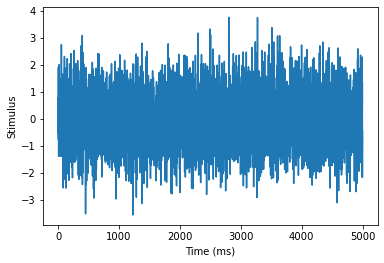

In [1]:
import numpy as np
import matplotlib.pyplot as plt

stimulus = np.random.randn(5000)
time = np.arange(5000)

plt.figure()
plt.plot(time, stimulus)
plt.xlabel("Time (ms)")
plt.ylabel("Stimulus")

Great! Now, we need to create our model neuron. Although we could do something fancy like use a Hodgkin and Huxley or integrate and fire neuron here, we are going to keep things simple. Here, our model neuron will respond with a 1 (i.e. a spike) each time the stimulus goes above 2, and will respond 0 in all other cases. Because real neurons cannot respond instantly, place your spike 100 ms after the stimulus goes above 2. (Note: you will not be able to do this for times within 100 ms of the end of the experiment).

In [5]:
modelNeuron = np.zeros(len(stimulus))

for i in range(len(stimulus)-100):
    if stimulus[i] > 2:
        modelNeuron[i+100] = 1

Plot your model neuron's response as a function of time.

Text(0, 0.5, 'Spikes')

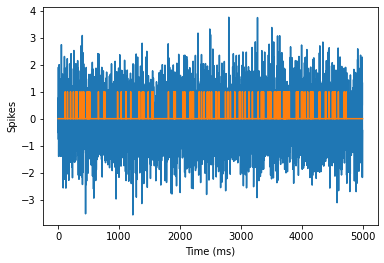

In [32]:
time = np.arange(5000)
plt.figure()
plt.plot(time, stimulus, time, modelNeuron)
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')

Now that we have both our stimulus and our response, we are ready to start building the spike-triggered average. Here are the steps you should follow:

* For each spike that occurs at least 200 ms after the start of the experiment:
* Isolate the stimulus from -200 to 0 before the spike (where 0 is the time of the spike). Place this stimulus into an array. 
* With your nSpikes x 200 ms array, average across the spikes to reveal the average stimulus in the 200 ms before each spike.
* Create a time vector that counts from -200 to 0, and plot your spike-triggered average against this time vector.

Text(0, 0.5, 'Stimulus average')

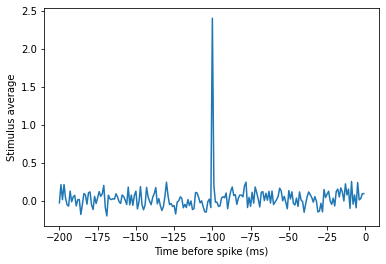

In [36]:
spikeLocs, = np.where(modelNeuron==1)
spikeLocs = spikeLocs[spikeLocs >= 200]

stimArray = np.zeros((len(spikeLocs), 200))

for i in range(len(spikeLocs)):
    stimArray[i,:] = stimulus[spikeLocs[i]-200:spikeLocs[i]]

    
STA = np.mean(stimArray, axis=0)

time = np.arange(-200,0,1)
plt.figure()
plt.plot(time, STA)
plt.xlabel("Time before spike (ms)")
plt.ylabel("Stimulus average")


This result should be intuitive - we see a peak in the stimulus 100 ms before the spike occurs. However, this is a little bit boring. Let's add some randomness to our magnitude detector. As before, your model neuron will fire if the stimulus goes above 2. However, this time, use **np.random.randint()** to choose a random time 50-150 ms after the stimulus peak to place your spike. Call this model neuron by a different variable name.

Compute the spike-triggered average for this new model neuron and plot it as before.

In [52]:
modelNeuron2 = np.zeros(len(stimulus))

for i in range(len(stimulus)-150):
    if stimulus[i] > 2:
        loc = np.random.randint(95, 105)
        modelNeuron2[i+loc] = 1

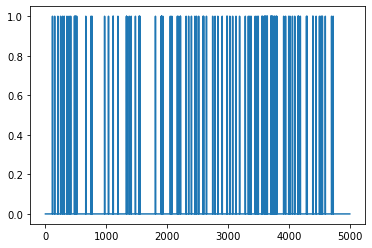

In [53]:
plt.figure()
plt.plot(np.arange(5000), modelNeuron2)

Text(0, 0.5, 'Stimulus average')

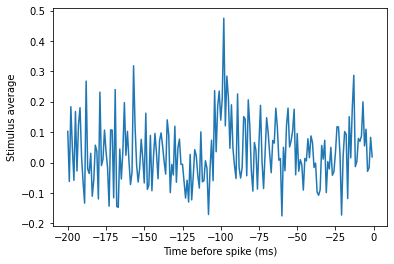

In [54]:
spikeLocs, = np.where(modelNeuron2==1)
spikeLocs = spikeLocs[spikeLocs >= 200]

stimArray = np.zeros((len(spikeLocs), 200))

for i in range(len(spikeLocs)):
    stimArray[i,:] = stimulus[spikeLocs[i]-200:spikeLocs[i]]

STA = np.mean(stimArray, axis=0)

time = np.arange(-200,0,1)
plt.figure()
plt.plot(time, STA)
plt.xlabel("Time before spike (ms)")
plt.ylabel("Stimulus average")